# Tabular Playground Series - Jun 2022

### Table of Contents : 

  * [Data Manipulation](#sec1)
       * [Importing Dataset](#sec1.1)
       * [Dataset View](#sec1.2)
       * [Dataset Information](#sec1.3)
       * [Summary Statistics](#sec1.4)
       * [Checking for unique values in integer type attribute](#sec1.5)
       * [Checking for missing values in each column](#sec1.6)
       * [percentage of missing values in each column](#sec1.7)
       
  * [Data Visualization](#sec2)
       * [Missing Value Plot](#sec2.1)
       * [Density Plot of Continuous Variable](#sec2.2)
       * [Heatmap](#sec2.3)
       * [Density Plot after applying power transformer](#sec2.4)
       
  * [Modeling](#sec3)
       * [Power Transformer :- Yeo-Johnson transform](#sec3.1)
       * [Iterative Imputer with Linear Regresson for predicting missing values](#sec3.2)
       
   * [Importing Submission File](#sec4)

## Data Manipulation <a class="anchor" id="sec1"></a>

### Importing libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

### Importing dataset <a class="anchor" id="sec1.1"></a>

In [3]:
df=pd.read_csv('../input/tabular-playground-series-jun-2022/data.csv')

### Dataset View <a class="anchor" id="sec1.2"></a>

In [4]:
df.head(10)

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,F_1_10,F_1_11,F_1_12,F_1_13,F_1_14,F_2_0,F_2_1,F_2_2,F_2_3,F_2_4,F_2_5,F_2_6,F_2_7,F_2_8,F_2_9,F_2_10,F_2_11,F_2_12,F_2_13,F_2_14,F_2_15,F_2_16,F_2_17,F_2_18,F_2_19,F_2_20,F_2_21,F_2_22,F_2_23,F_2_24,F_3_0,F_3_1,F_3_2,F_3_3,F_3_4,F_3_5,F_3_6,F_3_7,F_3_8,F_3_9,F_3_10,F_3_11,F_3_12,F_3_13,F_3_14,F_3_15,F_3_16,F_3_17,F_3_18,F_3_19,F_3_20,F_3_21,F_3_22,F_3_23,F_3_24,F_4_0,F_4_1,F_4_2,F_4_3,F_4_4,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,-0.500665,-1.416075,1.201521,0.551902,-0.759827,NaN,2,2,0,3,2,1,1,3,2,2,3,3,2,5,4,1,0,1,0,2,1,2,0,1,2,-0.240522,0.061529,0.561090,-0.171943,-0.431996,0.473508,0.596924,0.819306,1.479061,1.264616,-1.116881,0.759443,-0.086915,-0.620685,0.057216,1.076380,-0.780608,-1.940907,-0.717021,0.599093,0.498347,0.118770,-0.228913,NaN,0.301610,5.547214,1.066871,-0.134313,-0.101040,-0.660871,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,-0.363425,-0.853630,0.674525,0.843058,-0.041438,0.259496,3,5,2,1,4,2,3,2,0,0,9,3,1,4,1,2,1,0,1,1,1,1,3,2,5,-0.446068,1.433358,0.040099,-1.994062,-0.602324,-0.611391,-1.151884,0.065485,0.352023,-0.843751,1.167272,0.921445,-0.839827,0.759015,-1.547387,0.720435,-0.944045,1.796462,-1.046357,-0.581515,0.704543,0.375222,0.705963,0.032771,NaN,-1.707374,-1.188114,-0.562419,-1.462988,1.290672,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,0.595777,-0.073235,-1.381605,-0.108676,0.703693,-0.464042,3,2,1,3,2,1,0,6,1,1,3,4,1,2,2,1,2,2,4,8,1,5,1,2,4,-0.770592,0.483139,-0.636484,-1.305018,-2.089889,0.276761,-1.208640,-0.855769,0.232363,0.215841,-1.031405,0.582437,-0.314639,-0.497409,0.489356,0.915049,-0.513410,0.904206,-0.056089,0.212927,-0.574126,-1.517749,-0.888472,0.142264,1.000822,1.914908,3.877128,NaN,0.358635,0.443973,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,-2.217847,-0.618973,0.742112,0.494157,0.744673,-0.769181,2,3,2,1,1,1,2,0,6,2,6,2,1,1,2,3,1,2,1,2,6,2,1,0,2,-0.691020,-1.003026,0.868989,0.464920,NaN,0.499838,0.203723,-0.451576,-1.233499,0.903493,1.144558,-1.479893,-0.414316,0.024820,-0.976814,0.176633,-0.940022,-1.918049,1.506448,0.604388,0.578250,-0.122676,-0.711811,0.228523,0.999599,-2.638262,0.546676,0.865400,-0.857077,2.667105,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,-1.143500,1.338692,1.193330,1.038010,-0.763692,0.513466,5,0,1,3,3,0,2,5,1,3,5,5,4,4,2,0,2,3,2,5,2,2,1,0,4,1.196402,1.076537,0.486482,0.424305,0.475876,0.426978,-1.668823,-0.843056,1.008980,-0.704152,-0.894834,1.491608,-0.149938,1.256330,2.427308,0.878677,0.594314,0.380175,0.666499,-0.664403,1.276316,NaN,-1.276574,-0.768874,1.852815,-0.230342,-0.459019,1.128705,-0.748683,NaN,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943
5,5,0.088609,NaN,0.270489,0.251012,0.280627,-1.705229,0.320000,-0.263370,2.066337,0.127959,-0.915227,0.078182,0.218353,0.095839,-1.186291,1,3,0,2,1,6,2,2,2,2,1,3,4,3,2,2,2,0,0,3,4,1,2,0,3,0.854419,0.596522,0.060765,-0.193643,-1.177509,-2.611274,0.744999,-0.970734,-0.628548,-0.135701,-1.536704,NaN,0.625563,1.110558,NaN,1.122967,-1.089091,0.223962,-0.943717,-0.228885,-1.636744,0.306580,-1.286761,-0.397555,1.737595,0.851356,-3.664918,-0.508008,0.887303,0.976945,-0.359761,1.740050,1.927704,-0.082221,-0.548425,-1.186292,-2.559834,1.041985,1.934286,0.478067
6,6,0.533210,1.662285,0.601138,-0.662212,0.033856,-0.056208,-1.781594,0.326768,1.5

### Dataset Information <a class="anchor" id="sec1.3"></a>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 81 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   row_id  1000000 non-null  int64  
 1   F_1_0   981603 non-null   float64
 2   F_1_1   981784 non-null   float64
 3   F_1_2   981992 non-null   float64
 4   F_1_3   981750 non-null   float64
 5   F_1_4   981678 non-null   float64
 6   F_1_5   981911 non-null   float64
 7   F_1_6   981867 non-null   float64
 8   F_1_7   981872 non-null   float64
 9   F_1_8   981838 non-null   float64
 10  F_1_9   981751 non-null   float64
 11  F_1_10  982039 non-null   float64
 12  F_1_11  981830 non-null   float64
 13  F_1_12  981797 non-null   float64
 14  F_1_13  981602 non-null   float64
 15  F_1_14  981961 non-null   float64
 16  F_2_0   1000000 non-null  int64  
 17  F_2_1   1000000 non-null  int64  
 18  F_2_2   1000000 non-null  int64  
 19  F_2_3   1000000 non-null  int64  
 20  F_2_4   1000000 non-null 

### Summary Statistics <a class="anchor" id="sec1.4"></a>

In [6]:
df.describe()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,F_1_10,F_1_11,F_1_12,F_1_13,F_1_14,F_2_0,F_2_1,F_2_2,F_2_3,F_2_4,F_2_5,F_2_6,F_2_7,F_2_8,F_2_9,F_2_10,F_2_11,F_2_12,F_2_13,F_2_14,F_2_15,F_2_16,F_2_17,F_2_18,F_2_19,F_2_20,F_2_21,F_2_22,F_2_23,F_2_24,F_3_0,F_3_1,F_3_2,F_3_3,F_3_4,F_3_5,F_3_6,F_3_7,F_3_8,F_3_9,F_3_10,F_3_11,F_3_12,F_3_13,F_3_14,F_3_15,F_3_16,F_3_17,F_3_18,F_3_19,F_3_20,F_3_21,F_3_22,F_3_23,F_3_24,F_4_0,F_4_1,F_4_2,F_4_3,F_4_4,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
count,1000000.000000,981603.000000,981784.000000,981992.000000,981750.000000,981678.000000,981911.000000,981867.000000,981872.000000,981838.000000,981751.000000,982039.000000,981830.000000,981797.000000,981602.000000,981961.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,981971.000000,981655.000000,981944.000000,981946.000000,981627.000000,981702.000000,981808.000000,981987.000000,981902.000000,981894.000000,981800.000000,981612.000000,981703.000000,981940.000000,981861.000000,981762.000000,981878.000000,981722.000000,981911.000000,981800.000000,981752.000000,981604.000000,981823.000000,981794.000000,981855.000000,981872.000000,981836.000000,981505.000000,981971.000000,982043.000000,981937.000000,981675.000000,981986.000000,981824.000000,981735.000000,981775.000000,981881.000000,981694.000000,982005.000000,981733.000000
mean,499999.500000,-0.000687,0.002091,0.000551,0.000982,0.002437,0.000635,-0.000124,-0.063857,-0.000014,0.000451,0.000185,-0.001129,-0.061151,-0.067064,-0.000905,2.687703,2.514404,0.976758,2.517147,2.941194,1.532953,1.491746,2.645875,1.177792,1.111291,3.279969,2.465888,2.759102,2.479939,1.717679,1.779894,1.801325,1.243386,1.557057,1.603460,2.230707,2.032374,1.605534,0.708911,3.133517,0.001737,-0.001147,0.000605,0.000834,0.001290,-0.002180,0.000058,0.001525,0.000773,-0.000440,0.001706,0.000733,0.000259,-0.002459,0.000727,-0.001513,-0.000665,-0.000214,0.000063,-0.064909,0.002370,-0.059327,0.000087,0.000365,-0.000817,0.326608,-0.330865,-0.085792,-0.195488,0.333060,0.335968,0.003773,0.334433,-0.071842,-0.079854,0.038282,0.551900,0.333509,0.330047,0.037223
std,288675.278932,1.000784,0.999878,0.999825,0.999847,1.001151,0.999927,1.000427,0.725986,1.000715,1.000194,0.999440,0.999691,0.712047,0.746430,0.999810,1.875394,1.751238,1.038289,1.653054,1.976869,1.351220,1.315535,1.744770,1.318677,1.095853,1.872243,1.600069,1.704955,1.646004,1.557458,1.458558,1.458531,1.246472,1.444595,1.420668,1.561235,1.609266,1.555298,1.079393,1.820703,1.001323,1.000467,0.998939,1.000365,1.000016,1.000120,0.999345,1.000698,1.001004,1.001646,0.999952,0.999465,1.000230,1.000259,0.998931,1.000498,0.999930,0.999569,1.000101,0.739428,0.998825,0.696850,0.999173,0.999914,1.000104,2.321696,2.406335,0.837157,0.820821,2.373767,2.352749,2.292272,2.358757,0.777855,0.806965,0.706913,4.996632,2.383485,2.364036,0.776354
min,0.000000,-4.664447,-4.790594,-4.870645,-5.053023,-5.363454,-5.508223,-5.199170,-6.990302,-4.566593,-4.997549,-4.794973,-4.612384,-7.063291,-6.895633,-4.630454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.693600,-4.466075,-4.885859,-4.677193,-5.009163,-4.870645,-5.018589,-5.053023,-5.508223,-4.846381,-4.626277,-4.597624,-4.533044,-4.746642,-5.363454,-4.448034,-4.821627,-4.806190,-5.199170,-6.069162,-4.997549,-7.146564,-4.740668,-5.251064,-4.891499,-12.878366,-12.532302,-9.663044,-9.942220,-12.825041,-12.536923,-11.132350,-11.677862,-10.091950,-9.864310,-10.353951,-26.276588,-11.524137,-10.661978,-9.983739
25%,249

### Checking for unique values in integer type attribute <a class="anchor" id="sec1.5"></a>

In [7]:
df.select_dtypes(include=['int64']).nunique().sort_values(ascending=True)

F_2_2          11
F_2_9          12
F_2_23         12
F_2_5          13
F_2_6          13
F_2_17         13
F_2_11         14
F_2_19         14
F_2_8          14
F_2_16         14
F_2_15         14
F_2_14         14
F_2_1          15
F_2_3          15
F_2_18         15
F_2_20         15
F_2_22         16
F_2_12         16
F_2_0          16
F_2_13         16
F_2_21         16
F_2_7          17
F_2_4          17
F_2_24         18
F_2_10         18
row_id    1000000
dtype: int64

### Checking for missing values in each column <a class="anchor" id="sec1.6"></a>

In [8]:
df.isnull().sum()

row_id        0
F_1_0     18397
F_1_1     18216
F_1_2     18008
F_1_3     18250
F_1_4     18322
F_1_5     18089
F_1_6     18133
F_1_7     18128
F_1_8     18162
F_1_9     18249
F_1_10    17961
F_1_11    18170
F_1_12    18203
F_1_13    18398
F_1_14    18039
F_2_0         0
F_2_1         0
F_2_2         0
F_2_3         0
F_2_4         0
F_2_5         0
F_2_6         0
F_2_7         0
F_2_8         0
F_2_9         0
F_2_10        0
F_2_11        0
F_2_12        0
F_2_13        0
F_2_14        0
F_2_15        0
F_2_16        0
F_2_17        0
F_2_18        0
F_2_19        0
F_2_20        0
F_2_21        0
F_2_22        0
F_2_23        0
F_2_24        0
F_3_0     18029
F_3_1     18345
F_3_2     18056
F_3_3     18054
F_3_4     18373
F_3_5     18298
F_3_6     18192
F_3_7     18013
F_3_8     18098
F_3_9     18106
F_3_10    18200
F_3_11    18388
F_3_12    18297
F_3_13    18060
F_3_14    18139
F_3_15    18238
F_3_16    18122
F_3_17    18278
F_3_18    18089
F_3_19    18200
F_3_20    18248
F_3_21  

### percentage of missing values in each column <a class="anchor" id="sec1.7"></a>

In [9]:
pd.options.display.float_format = '{:,.2f} %'.format
(df.isnull().sum()/len(df))*100

row_id   0.00 %
F_1_0    1.84 %
F_1_1    1.82 %
F_1_2    1.80 %
F_1_3    1.82 %
F_1_4    1.83 %
F_1_5    1.81 %
F_1_6    1.81 %
F_1_7    1.81 %
F_1_8    1.82 %
F_1_9    1.82 %
F_1_10   1.80 %
F_1_11   1.82 %
F_1_12   1.82 %
F_1_13   1.84 %
F_1_14   1.80 %
F_2_0    0.00 %
F_2_1    0.00 %
F_2_2    0.00 %
F_2_3    0.00 %
F_2_4    0.00 %
F_2_5    0.00 %
F_2_6    0.00 %
F_2_7    0.00 %
F_2_8    0.00 %
F_2_9    0.00 %
F_2_10   0.00 %
F_2_11   0.00 %
F_2_12   0.00 %
F_2_13   0.00 %
F_2_14   0.00 %
F_2_15   0.00 %
F_2_16   0.00 %
F_2_17   0.00 %
F_2_18   0.00 %
F_2_19   0.00 %
F_2_20   0.00 %
F_2_21   0.00 %
F_2_22   0.00 %
F_2_23   0.00 %
F_2_24   0.00 %
F_3_0    1.80 %
F_3_1    1.83 %
F_3_2    1.81 %
F_3_3    1.81 %
F_3_4    1.84 %
F_3_5    1.83 %
F_3_6    1.82 %
F_3_7    1.80 %
F_3_8    1.81 %
F_3_9    1.81 %
F_3_10   1.82 %
F_3_11   1.84 %
F_3_12   1.83 %
F_3_13   1.81 %
F_3_14   1.81 %
F_3_15   1.82 %
F_3_16   1.81 %
F_3_17   1.83 %
F_3_18   1.81 %
F_3_19   1.82 %
F_3_20   1.82 %
F_3_21  

In [10]:
pd.options.display.float_format = '{:,.2f}'.format

## Data Visualization <a class="anchor" id="sec2"></a>

### Missing Value Plot <a class="anchor" id="sec2.1"></a>

In [11]:
import missingno as msno

<AxesSubplot:>

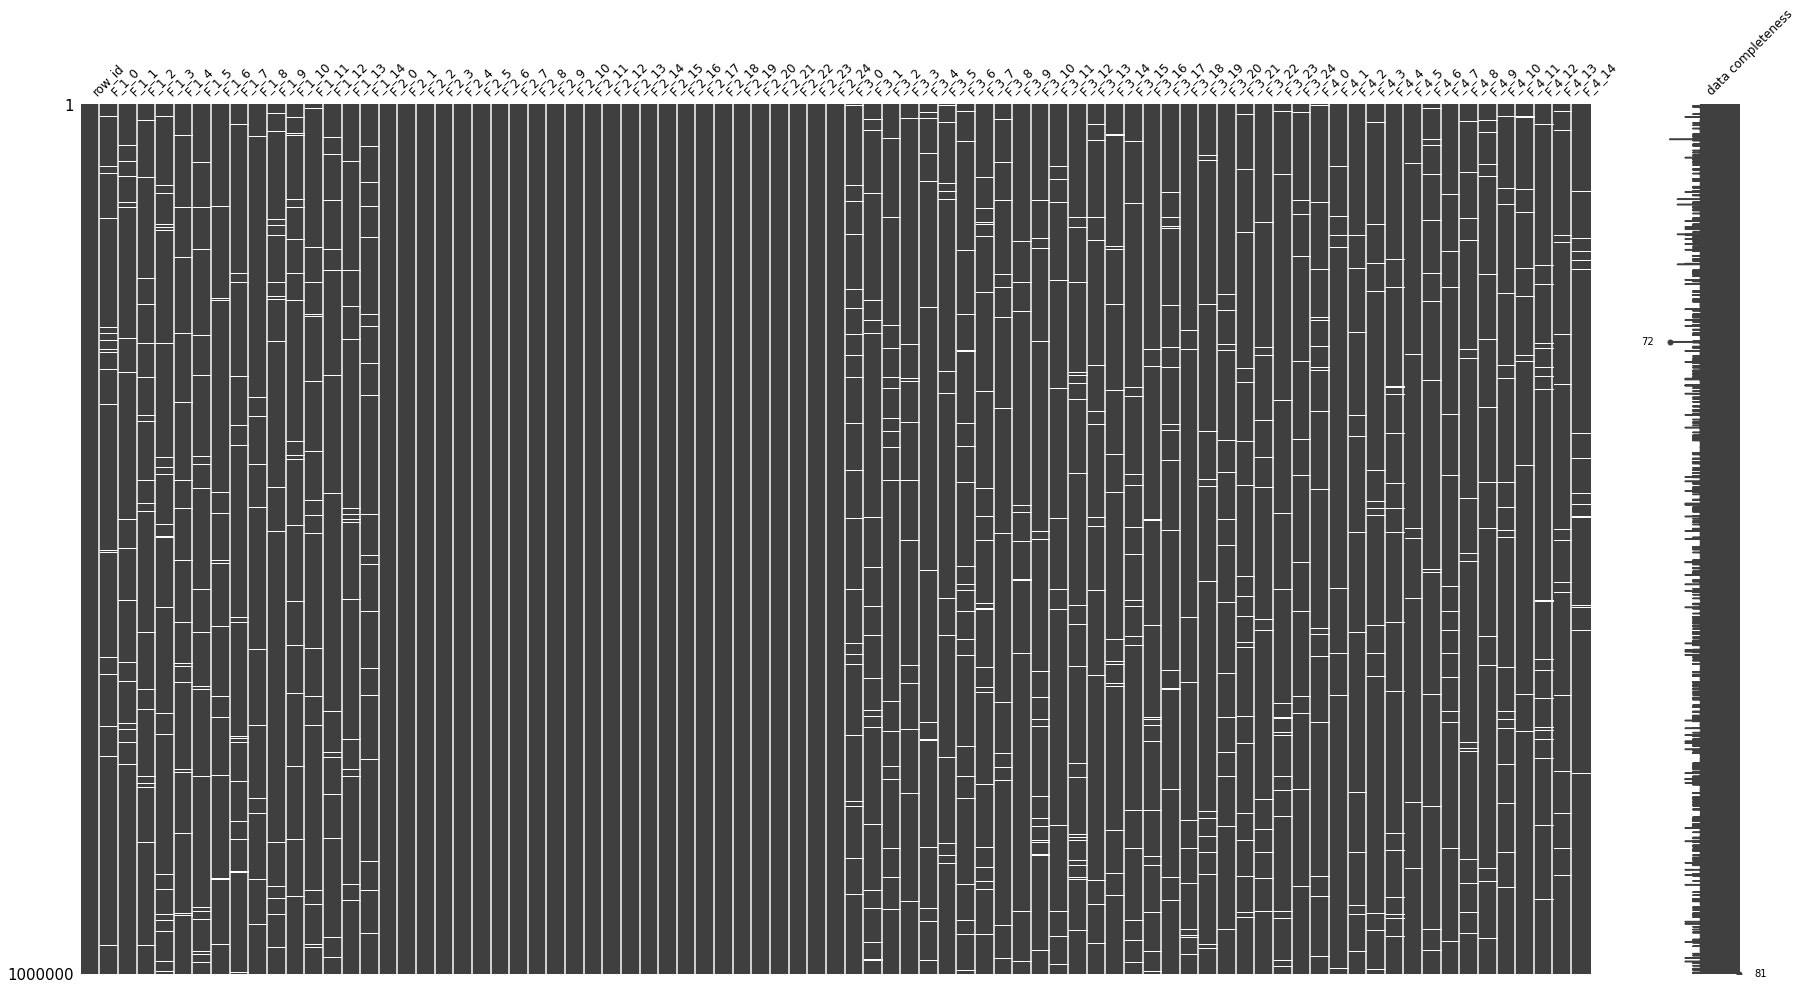

In [27]:
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

### Checking the data distribution of each Continuous variable  <a class="anchor" id="sec2.2"></a>

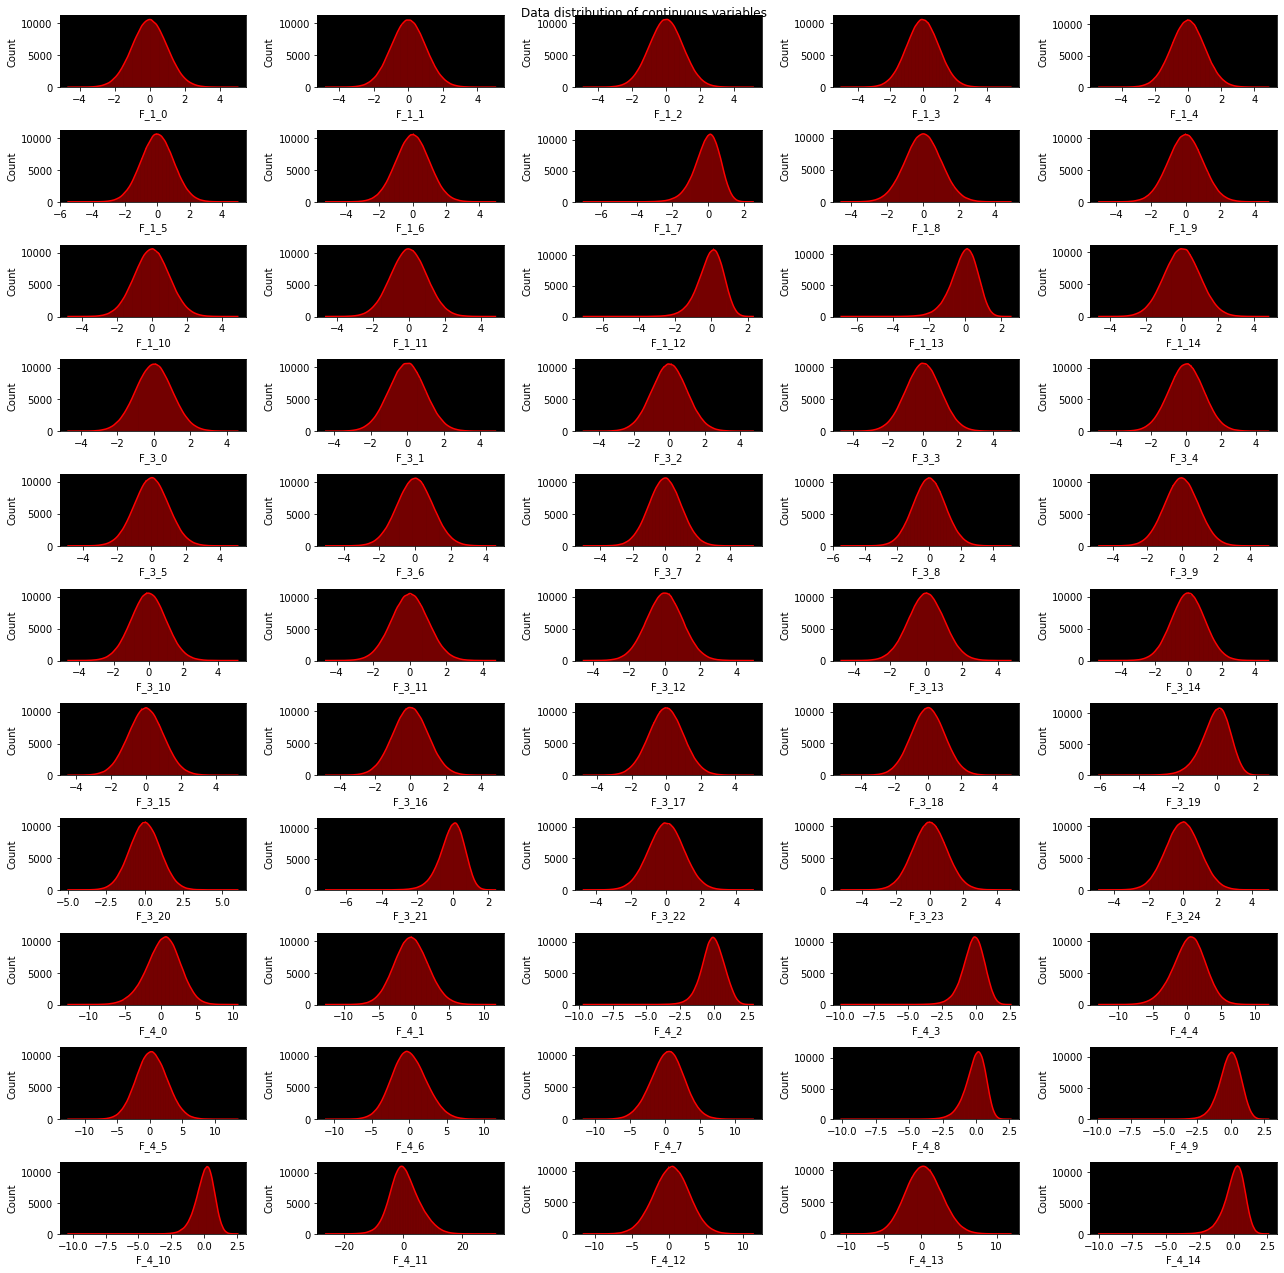

In [14]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(11,5, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

Here we can see that there are a lot of attributes which are positively or negatively distributed.so we will use power transformation to make these attributes symmetrical.

In [15]:
df1=df[df.select_dtypes(include=['float64']).columns]#separating missing values column

### Power Transformer <a class="anchor" id="sec3.1"></a>

#### we will use Yeo-Johnson transform for transforming our data.A power transform will make the probability distribution of a variable more Gaussian

In [16]:
from sklearn.preprocessing import PowerTransformer

In [18]:
power = PowerTransformer(method='yeo-johnson', standardize=False)
df2=power.fit_transform(df1)

In [19]:
df2=pd.DataFrame(df2,columns=list(df1.columns))

### Heatmap <a class="anchor" id="sec2.3"></a>

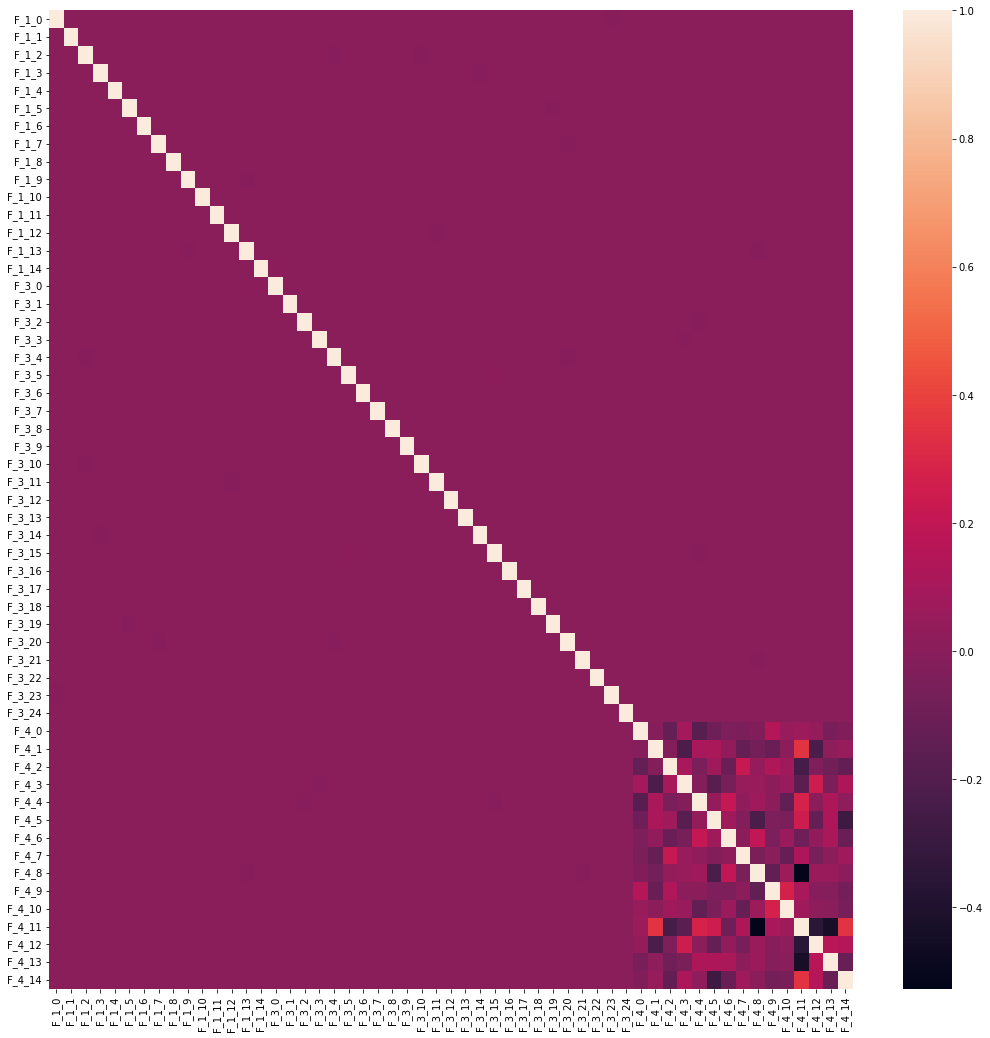

In [20]:
plt.figure(figsize=(18,18))
sns.heatmap(df2.corr(),annot=False)
plt.show()

In [21]:
df2.head()

,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,F_1_10,F_1_11,F_1_12,F_1_13,F_1_14,F_3_0,F_3_1,F_3_2,F_3_3,F_3_4,F_3_5,F_3_6,F_3_7,F_3_8,F_3_9,F_3_10,F_3_11,F_3_12,F_3_13,F_3_14,F_3_15,F_3_16,F_3_17,F_3_18,F_3_19,F_3_20,F_3_21,F_3_22,F_3_23,F_3_24,F_4_0,F_4_1,F_4_2,F_4_3,F_4_4,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,-0.35,-0.46,2.30,0.73,1.70,0.14,-0.52,0.55,-1.85,-0.50,-1.42,1.20,0.60,-0.68,NaN,-0.24,0.06,0.56,-0.17,-0.43,0.47,0.60,0.82,1.48,1.26,-1.12,0.76,-0.09,-0.62,0.06,1.08,-0.78,-1.94,-0.72,0.66,0.50,0.12,-0.23,NaN,0.30,6.03,1.06,-0.13,-0.10,-0.65,3.67,0.78,0.27,-0.50,0.20,0.40,5.74,3.85,1.22,1.46
1,1.38,-0.50,-0.42,1.91,-0.83,-1.71,-0.58,-0.90,0.60,-0.36,-0.85,0.67,0.96,-0.04,0.26,-0.45,1.43,0.04,-1.99,-0.60,-0.61,-1.15,0.07,0.35,-0.84,1.17,0.92,-0.84,0.76,-1.55,0.72,-0.94,1.80,-1.05,-0.53,0.70,0.40,0.71,0.03,NaN,-1.64,-1.20,-0.54,-1.25,1.33,-2.95,-0.75,2.41,-0.06,0.79,-0.26,4.88,-4.18,-2.78,-0.06
2,0.26,-1.06,NaN,0.35,1.51,1.24,-0.51,-0.71,-0.12,0.60,-0.07,-1.38,-0.11,0.78,-0.46,-0.77,0.48,-0.64,-1.30,-2.09,0.28,-1.21,-0.86,0.23,0.22,-1.03,0.58,-0.31,-0.50,0.49,0.92,-0.51,0.90,-0.06,0.22,-0.57,-1.26,-0.89,0.14,1.00,2.00,3.81,NaN,0.38,0.45,2.22,0.47,2.54,0.38,-0.25,-0.00,-0.12,-2.12,3.57,-0.13
3,-0.73,-2.43,-2.45,-0.02,0.33,0.09,-1.79,0.74,0.76,-2.22,-0.62,0.74,0.54,0.83,-0.77,-0.69,-1.00,0.87,0.47,NaN,0.50,0.20,-0.45,-1.24,0.90,1.14,-1.48,-0.41,0.02,-0.98,0.18,-0.94,-1.92,1.51,0.66,0.58,-0.12,-0.71,0.23,1.00,-2.50,0.54,0.92,-0.77,2.80,1.98,-4.92,-0.84,-0.25,0.72,-0.51,7.76,-4.69,-3.13,0.55
4,0.59,-0.07,0.47,-1.10,0.12,-1.81,0.47,-0.05,-0.58,-1.14,1.34,1.19,1.21,-0.68,0.51,1.20,1.08,0.49,0.42,0.48,0.43,-1.67,-0.84,1.01,-0.70,-0.90,1.49,-0.15,1.26,2.43,0.88,0.59,0.38,0.67,-0.60,1.28,NaN,-1.28,-0.77,1.85,-0.23,-0.46,1.22,-0.68,NaN,0.97,2.47,3.46,0.99,0.75,0.61,-6.46,-2.85,3.64,-0.63


### Again Checking data distribution after applying power transformation <a class="anchor" id="sec2.4"></a>

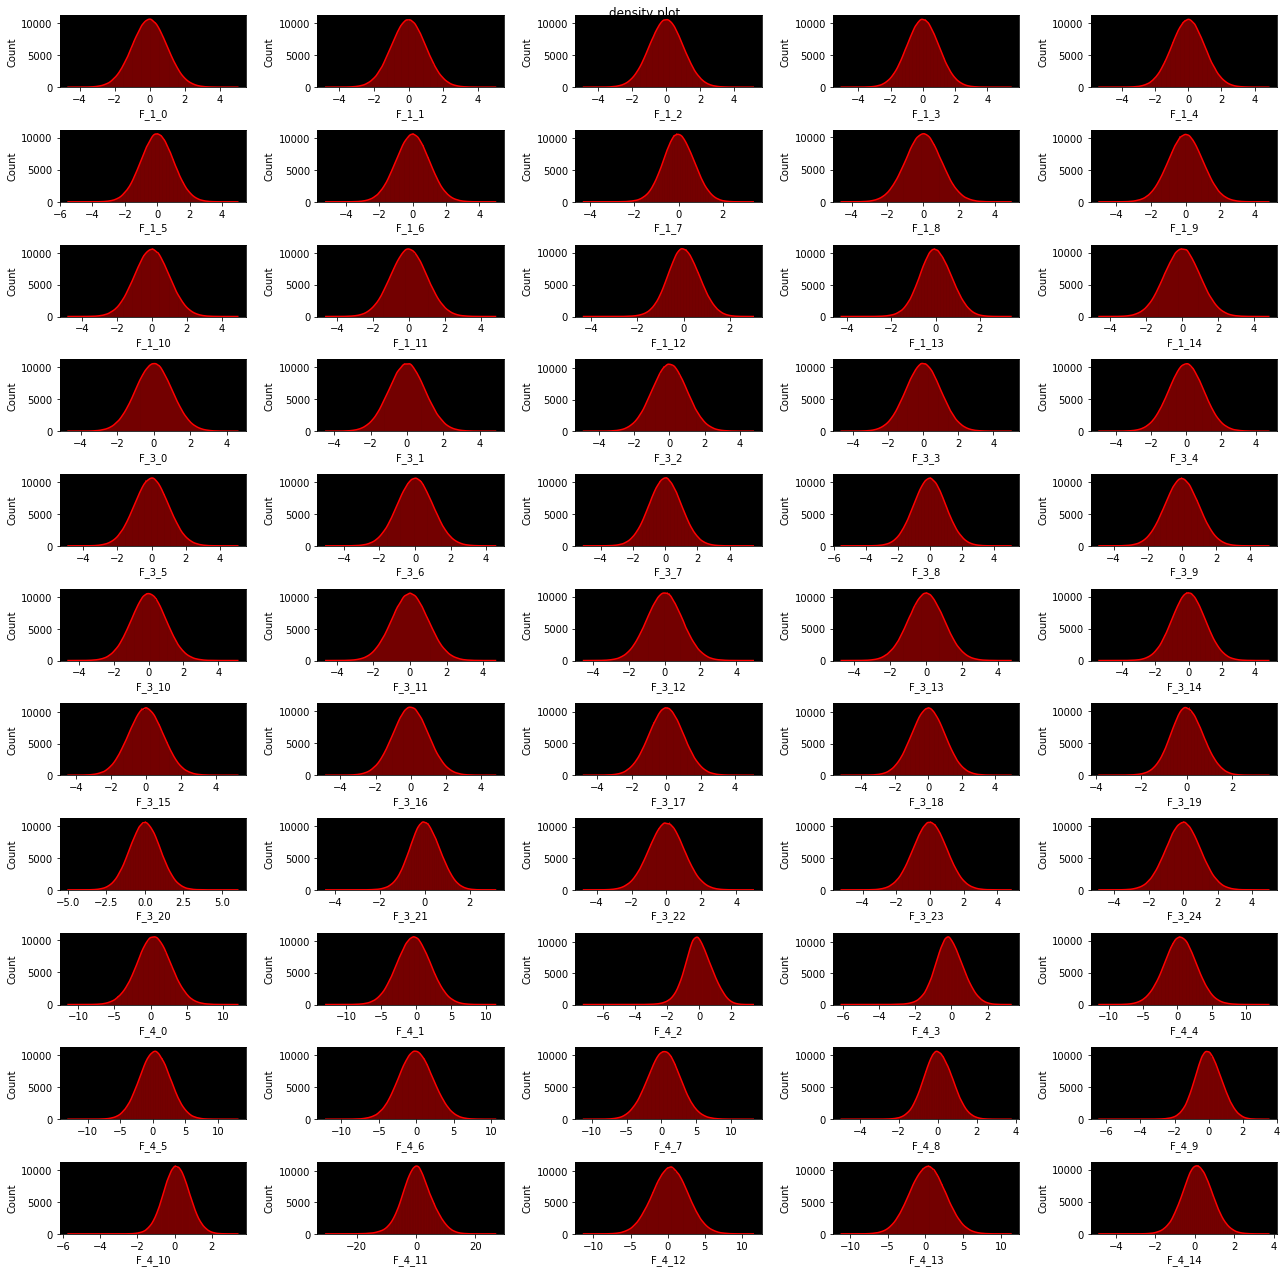

In [23]:
plt.figure(figsize=(18,18))
for i,col in enumerate(df2.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax=plt.subplot(11,5,i+1)
    sns.histplot(data=df2,x=col,ax=ax,kde=True,color='red')
plt.suptitle('density plot')
plt.tight_layout()
plt.show()

## Modeling <a class="anchor" id="sec3"></a>

### Applying Iterative Imputer with Linear Regresson for predicting missing values <a class="anchor" id="sec3.2"></a>

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [26]:
imp=IterativeImputer(estimator=LinearRegression(),missing_values=np.nan)

In [ ]:
df3=imp.fit_transform(df2)

## final checking for missing values after predicting missing values

In [ ]:
df4=pd.DataFrame(df3,columns=df2.columns)

In [ ]:
df4.head()

In [ ]:
df4.isnull().sum()

### Importing Submission file <a class="anchor" id="sec4"></a>

In [ ]:
sub=pd.read_csv('../input/tabular-playground-series-jun-2022/sample_submission.csv')

In [ ]:
split=sub['row-col'].str.split(pat="-",expand=True)

In [ ]:
row=split.iloc[:,0].astype('int64')
col=split.iloc[:,1].astype('str')

In [ ]:
val=[]
for i in range(0,len(row)):
    a=row[i]
    b=col[i]
    val.append(df4.loc[a,b])

In [ ]:
sub['value']=val
sub.to_csv('final_submission.csv',index=False)